In [1]:
import act
import matplotlib.pyplot as plt
import numpy as np
import os

import sys
sys.path.append("/home/elilouis/sublimationofsnow")
import sosutils

# Inputs

In [2]:
# datelist = ['20221031', '20221101', '20221102', '20221103']
# datelist = ['20221217', '20221218', '20221219', '20221220', '20221221', '20221222']
# datelist = ['20230219', '20230220', '20230221', '20230222', '20230223', '20230224', '20230225']
datelist = ['20230131', '20230201', '20230202', '20230203', '20230204', '20230204']
# datelist = ['20230204', '20230205', '20230206', '20230207', '20230208', '20230209']
# datelist = ['20230316', '20230317', '20230318', '20230319', '20230320']

sail_code_kazr = 'guckazrcfrgeM1.a1'
sail_code_ld = 'gucldM1.b1'
sail_code_ceil = 'gucceilM1.b1'

output_dir_fmcw = "/data2/elilouis/noaa_psl_data/fmcw/"
output_dir_parsivel = "/data2/elilouis/noaa_psl_data/parsivel/"
output_dir_kazr = f"/data2/elilouis/{sail_code_kazr}/"
output_dir_ld = f"/data2/elilouis/{sail_code_ld}/"
output_dir_ceil = f"/data2/elilouis/{sail_code_ceil}/"

username = os.getenv("ARM_USERNAME")
token = os.getenv("ARM_TOKEN")


# Download data

## FMCW Radar

In [ ]:
downloaded_files_fmcw = act.discovery.download_noaa_psl_data(
    site='kps',
    instrument='Radar FMCW Moment',
    startdate=datelist[0],
    enddate=datelist[-1],
    output=output_dir_fmcw
)

## Parsivel data

In [ ]:
downloaded_files_parsivel = act.discovery.download_noaa_psl_data(
    site='kps',
    instrument='Parsivel',
    startdate=datelist[0],
    enddate=datelist[-1],
    output= output_dir_parsivel
)

## Laser Disdrometer

In [ ]:
downloaded_files_ld = act.discovery.download_data(
    username,
    token,
    sail_code_ld,
    startdate=datelist[0],
    enddate=datelist[-1],
    output=output_dir_ld
)

## KAZR


In [3]:
downloaded_files_kazr = act.discovery.download_data(
    username,
    token,
    sail_code_kazr,
    startdate=datelist[0],
    enddate=datelist[-1],
    output=output_dir_kazr
)

[DOWNLOADING] guckazrcfrgeM1.a1.20230131.050004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.080002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.100005.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.120003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.190005.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.220000.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.010001.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.020003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.030003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.060004.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.130005.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.160002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.170002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.180003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.205959.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.040005.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.070002.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.090003.nc
[DOWNLOADING] guckazrcfrgeM1.a1.20230131.110003.nc
[DOWNLOADING] guckazrcfrgeM1.a1

In [4]:
downloaded_files_kazr

['/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.060003.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.070003.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.120002.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.125959.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.140005.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.160005.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.170003.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.190004.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230222.230005.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.000002.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.050005.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.020000.nc',
 '/data2/elilouis/guckazrcfrgeM1.a1/guckazrcfrgeM1.a1.20230223.030002.nc',
 '/data2/elilouis/guckazr

## Ceilometer

In [ ]:
downloaded_files_ceil = act.discovery.download_data(
    username,
    token,
    sail_code_ceil,
    startdate=datelist[0],
    enddate=datelist[-1],
    output=output_dir_ceil
)

# Open data

## FMCW

In [ ]:
fmcw_moment_ds = act.io.noaapsl.read_psl_radar_fmcw_moment(
    [f for f in downloaded_files_fmcw if f.endswith(".raw")]
)

## Parsivel

In [ ]:
parsivel_ds = act.io.noaapsl.read_psl_parsivel(downloaded_files_parsivel)

## Laser disdrometer

In [ ]:
ld_ds = act.io.armfiles.read_netcdf(downloaded_files_ld)
# ld_ds = act.io.noaapsl.read_netcdf(downloaded_files_ld)

## KAZR

In [4]:
kazr_ds = act.io.armfiles.read_netcdf(downloaded_files_kazr)

In [5]:
kazr_ds

<xarray.Dataset>
Dimensions:                             (time: 164931, frequency: 1,
                                         range: 600, sweep: 1, r_calib: 1)
Coordinates:
  * time                                (time) datetime64[ns] 2023-01-31T01:0...
  * frequency                           (frequency) float32 3.489e+10
  * range                               (range) float32 100.7 ... 1.806e+04
    azimuth                             (time) float32 dask.array<chunksize=(1737,), meta=np.ndarray>
    elevation                           (time) float32 dask.array<chunksize=(1737,), meta=np.ndarray>
Dimensions without coordinates: sweep, r_calib
Data variables: (12/38)
    base_time                           (time) datetime64[ns] 2023-01-31T01:0...
    time_offset                         (time) datetime64[ns] 2023-01-31T01:0...
    linear_depolarization_ratio         (time, range) float32 dask.array<chunksize=(1737, 600), meta=np.ndarray>
    mean_doppler_velocity               (time, range) float32 dask.array<chunksize=(1737, 600), meta=np.ndarray>
    mean_doppler_velocity_crosspolar_v  (time, range) float32 dask.array<chunksize=(1737, 600), meta=np.ndarray>
    reflectivity                        (time, range) float32 dask.array<chunksize=(1737, 600), meta=np.ndarray>
    ...                                  ...
    longitude                           (time) float64 -107.0 -107.0 ... -107.0
    altitude                            (time) float64 2.886e+03 ... 2.886e+03
    altitude_agl                        (time) float64 3.0 3.0 3.0 ... 3.0 3.0
    lat                                 (time) float64 38.96 38.96 ... 38.96
    lon                                 (time) float64 -107.0 -107.0 ... -107.0
    alt                                 (time) float64 2.886e+03 ... 2.886e+03
Attributes: (12/35)
    command_line:             kazrcfr_ingest -s guc -f M1
    Conventions:              ARM-1.3 CF/Radial-1.4 instrument_parameters rad...
    process_version:          ingest-kazrcfr-1.3-0.el7
    dod_version:              kazrcfrge-a1-1.1
    input_source:             /data/collection/guc/guckazrM1.00/KAZR_MOMENTS_...
    site_id:                  guc
    ...                       ...
    doi:                      10.5439/1498936
    history:                  created by user dsmgr on machine prod-proc2.adc...
    _file_dates:              ['20230131', '20230131', '20230131', '20230131'...
    _file_times:              ['010001', '020003', '030003', '040005', '05000...
    _datastream:              guckazrcfrgeM1.a1
    _arm_standards_flag:      1

## Ceilometer

In [ ]:
ceil_ds = act.io.armfiles.read_netcdf(downloaded_files_ceil)

# Plot Daily Data

In [ ]:
fmcw_moment_ds_local = sosutils.modify_xarray_timezone(fmcw_moment_ds, 'UTC', 'US/Mountain')

In [ ]:
parsivel_ds_local = sosutils.modify_xarray_timezone(parsivel_ds, 'UTC', 'US/Mountain')

In [ ]:
ld_ds_local = sosutils.modify_xarray_timezone(ld_ds, 'UTC', 'US/Mountain')

In [6]:
kazr_ds_local = sosutils.modify_xarray_timezone(kazr_ds, 'UTC', 'US/Mountain')

In [ ]:
ceil_ds_local = sosutils.modify_xarray_timezone(ceil_ds, 'UTC', 'US/Mountain')

In [7]:
# RESAMPLE_TIME  = "10Min"
RESAMPLE_TIME = None
if RESAMPLE_TIME:
#     fmcw_moment_ds_local_resampled = fmcw_moment_ds_local.resample(time=RESAMPLE_TIME).mean()
#     parsivel_ds_local_resampled = parsivel_ds_local.resample(time=RESAMPLE_TIME).mean()
#     ld_ds_local_resampled = ld_ds_local.resample(time=RESAMPLE_TIME).mean()
#     ld_ds_local_resampled = ld_ds_local.resample(time=RESAMPLE_TIME).mean()
    kazr_ds_local_resampled = kazr_ds_local.resample(time=RESAMPLE_TIME).mean()
    # ceil_ds_local_resampled = ceil_ds_local.resample(time=RESAMPLE_TIME).mean()
else:
    # fmcw_moment_ds_local_resampled = fmcw_moment_ds_local
    # parsivel_ds_local_resampled = parsivel_ds_local
    # ld_ds_local_resampled = ld_ds_local
    # ld_ds_local_resampled = ld_ds_local
    kazr_ds_local_resampled = kazr_ds_local
    # ceil_ds_local_resampled = ceil_ds_local

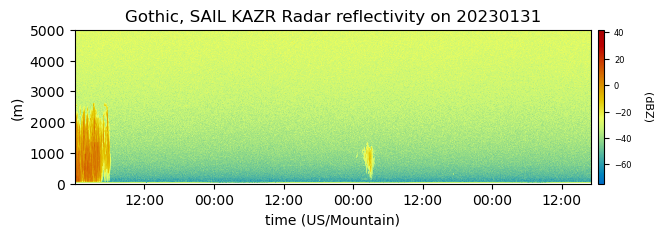

In [9]:
# Create display object with both datasets
display_5min = act.plotting.TimeSeriesDisplay(
    {
        "Gothic, SAIL KAZR Radar": kazr_ds_local_resampled.sel(
            time=slice('2023-01-31 00:00', '2023-02-05 00:00')
        )
    },
    subplot_shape=(1,), 
    figsize=(6.66, 2)
)

display_5min.plot(
    'reflectivity', 
    dsname='Gothic, SAIL KAZR Radar',
    cmap='act_HomeyerRainbow', 
    subplot_index=(0,)
)

# Set limits
display_5min.axes[0].set_ylim([0, 5000])
for cb in display_5min.cbs:
    cb.ax.set_ylabel(cb.ax.get_ylabel(), labelpad=15)

# for ax in display_5min.axes:
#     ax.set_xlim(np.datetime64("2023-01-31"), np.datetime64("2023-02-04"))
display_5min.axes[-1].set_xlabel("time (US/Mountain)")
plt.subplots_adjust(hspace=0.40)
plt.show()

In [ ]:
# Create display object with both datasets
display_5min = act.plotting.TimeSeriesDisplay(
    {
        "Kettle Ponds, NOAA PSL Radar FMCW": fmcw_moment_ds_local_resampled,
        "Kettle Ponds, NOAA Parsivel": parsivel_ds_local_resampled,
        "Gothic, SAIL Laser Disdrometer": ld_ds_local_resampled,
        "Gothic, SAIL Laser Disdrometer Precip Rate": ld_ds_local_resampled,
        "Gothic, SAIL KAZR Radar": kazr_ds_local_resampled,
        "Gothic, SAIL Ceilometer": ceil_ds_local_resampled
    },
    subplot_shape=(6,), 
    figsize=(15, 15)
)

# Plot the subplots
display_5min.plot(
    'reflectivity_uncalibrated', 
    dsname='Kettle Ponds, NOAA PSL Radar FMCW',
    cmap='act_HomeyerRainbow', 
    subplot_index=(0,)
)
display_5min.plot(
    'backscatter',
    dsname='Gothic, SAIL Ceilometer',
    cmap='act_HomeyerRainbow', 
    subplot_index=(1,),
    vmin=0, vmax=4000
)
display_5min.plot(
    'reflectivity', 
    dsname='Gothic, SAIL KAZR Radar',
    cmap='act_HomeyerRainbow', 
    subplot_index=(2,)
)
display_5min.plot(
    'number_density_drops', 
    dsname='Kettle Ponds, NOAA Parsivel',
    cmap='act_HomeyerRainbow', 
    subplot_index=(3,)
)
display_5min.plot(
    'number_density_drops', 
    dsname='Gothic, SAIL Laser Disdrometer',
    cmap='act_HomeyerRainbow', 
    subplot_index=(4,)
)
display_5min.plot(
    'precip_rate',
    dsname='Gothic, SAIL Laser Disdrometer',
    cmap='act_HomeyerRainbow', 
    subplot_index=(5,)
)

# Set limits
display_5min.axes[0].set_ylim([0, 5000])
display_5min.axes[1].set_ylim([0, 5000])
display_5min.axes[2].set_ylim([0, 5000])
display_5min.axes[3].set_ylim([0, 5])
display_5min.axes[4].set_ylim([0, 5])
for cb in display_5min.cbs:
    cb.ax.set_ylabel(cb.ax.get_ylabel(), labelpad=15)

for ax in display_5min.axes:
    ax.set_xlim(np.datetime64("2023-01-31"), np.datetime64("2023-02-04"))
display_5min.axes[-1].set_xlabel("time (US/Mountain)")
plt.subplots_adjust(hspace=0.40)
plt.show()